In [80]:
# Import all relevant libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px

# Read in the csv file and convert to a Pandas dataframe
# Convert 'Date_de_recrutement' and 'Date_de_départ' to datetime objects : This step is handled by the 'parse_dates' parameter in read_csv
# dayfirst=True --> the dates in my CSV file are in DD/MM/YYYY format, but pandas is interpreting them as MM/DD/YYYY (which is the default).

df = pd.read_csv("turnover_data.csv", parse_dates=['Date_de_recrutement', 'Date_de_départ'], dayfirst=True)

In [81]:
# Return number of rows and columns
df.shape

(350, 9)

In [82]:
# Return first 5 rows of the dataset
df.head()

,Matricule,Nom,Prénom,Genre,Date_de_recrutement,Date_de_départ,Raison_du_départ,Service,Poste_occupé
0,1,Brown,Stephen,Femme,2023-05-28,NaT,NaN,RH,Contrôleur de gestion sociale
1,2,Castillo,Erin,Femme,2023-08-09,NaT,NaN,Services_techniques,Ingénieur amélioration continue
2,3,Rivera,Raven,Homme,2023-11-30,2023-12-22,Licenciement_économique,Marketing,Ingénieur packaging
3,4,Jackson,Kevin,Femme,2023-06-11,NaT,NaN,Informatique,Administrateur système
4,5,Fernandez,Jessica,Homme,2023-08-30,NaT,NaN,Informatique,Data engineer


In [83]:
# Return info on dataset including the names of the different columns and their corresponding data types as well as the number of non-null values.
df.describe()

,Matricule,Date_de_recrutement,Date_de_départ
count,350.000000,350,48
mean,175.500000,2023-07-07 05:12:41.142857216,2023-10-16 14:00:00
min,1.000000,2023-01-01 00:00:00,2023-04-15 00:00:00
25%,88.250000,2023-04-06 00:00:00,2023-09-11 18:00:00
50%,175.500000,2023-07-08 00:00:00,2023-11-14 00:00:00
75%,262.750000,2023-10-06 12:00:00,2023-12-12 00:00:00
max,350.000000,2023-12-29 00:00:00,2023-12-30 00:00:00
std,101.180532,NaN,NaN


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Matricule            350 non-null    int64         
 1   Nom                  350 non-null    object        
 2   Prénom               350 non-null    object        
 3   Genre                350 non-null    object        
 4   Date_de_recrutement  350 non-null    datetime64[ns]
 5   Date_de_départ       48 non-null     datetime64[ns]
 6   Raison_du_départ     48 non-null     object        
 7   Service              350 non-null    object        
 8   Poste_occupé         350 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 24.7+ KB


In [85]:
# Checking the dataset for missing or null values. The isna() method which returns a dataframe of boolean values indicating if a field is null or not.
df.isna()

,Matricule,Nom,Prénom,Genre,Date_de_recrutement,Date_de_départ,Raison_du_départ,Service,Poste_occupé
0,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...
345,False,False,False,False,False,False,False,False,False
346,False,False,False,False,False,True,True,False,False
347,False,False,False,False,False,True,True,False,False
348,False,False,False,False,False,False,False,False,False


In [86]:
# Display number missing values per column. To group all missing values by column, we can include the sum() method.
df.isna().sum()

Matricule                0
Nom                      0
Prénom                   0
Genre                    0
Date_de_recrutement      0
Date_de_départ         302
Raison_du_départ       302
Service                  0
Poste_occupé             0
dtype: int64

In [87]:
# Both certains columns will not be relevant for our analysis, we can delete "Matricule", "Nom" and "Prénom" columns.
# The axis parameter is used to define along which axis the operation should be performed.
# axis=0 or axis='index': The operation should be performed along the index, or "row-wise". This is the default value for many operations in pandas.
# axis=1 or axis='columns': This means the operation should be performed along the columns, or "column-wise".
# The drop() function does not directly delete a column in the original DataFrame unless specify "inplace=True".
# By default, inplace is set to False, which means the function will return a new DataFrame without the specified columns, and the original DataFrame remains unchanged.

df.drop(["Matricule","Nom","Prénom"],axis=1)

,Genre,Date_de_recrutement,Date_de_départ,Raison_du_départ,Service,Poste_occupé
0,Femme,2023-05-28,NaT,NaN,RH,Contrôleur de gestion sociale
1,Femme,2023-08-09,NaT,NaN,Services_techniques,Ingénieur amélioration continue
2,Homme,2023-11-30,2023-12-22,Licenciement_économique,Marketing,Ingénieur packaging
3,Femme,2023-06-11,NaT,NaN,Informatique,Administrateur système
4,Homme,2023-08-30,NaT,NaN,Informatique,Data engineer
...,...,...,...,...,...,...
345,Homme,2023-08-12,2023-10-27,Démission,Finance,Assistant de gestion
346,Homme,2023-02-26,NaT,NaN,Ventes,Business developer
347,Femme,2023-06-14,NaT,NaN,RH,Contrôleur de gestion sociale
348,Femme,2023-06-22,2023-10-07,Rupture_conventionnelle,Informatique,Administrateur système


In [88]:
# Define a function to calculate tenure (ancienneté)
def calculate_tenure(row):
    # If 'Date_de_départ' is not NaN, use it; otherwise, use the current date
    end_date = row['Date_de_départ'] if not pd.isnull(row['Date_de_départ']) else datetime(2023, 12, 31)
    # Calculate the tenure
    return (end_date - row['Date_de_recrutement']).days

In [89]:
# Apply the function to each row
df['Tenure'] = df.apply(calculate_tenure, axis=1)

In [90]:
# Display Tenure
print(df[['Matricule', 'Tenure']])

     Matricule  Tenure
0            1     217
1            2     144
2            3      22
3            4     203
4            5     123
..         ...     ...
345        346      76
346        347     308
347        348     200
348        349     107
349        350     242

[350 rows x 2 columns]


In [91]:
# Calcul de l'effectif moyen annuel 
# Step 1: Create a function to calculate the number of employees present in each month
def calculate_monthly_employees(df, year=2023):
    monthly_counts = []
    for month in range(1, 13):
        # Define the start and end of the month
        start_date = pd.Timestamp(year=year, month=month, day=1)
        if month == 12:
            end_date = pd.Timestamp(year=year, month=month, day=31)
        else:
            end_date = pd.Timestamp(year=year, month=month+1, day=1) - pd.Timedelta(days=1)
        
        # Count employees who were recruited before the end of the month and either
        # left after the start of the month or have not left yet (NaN in 'Date_de_départ')
        count = df[(df['Date_de_recrutement'] <= end_date) &
                   ((df['Date_de_départ'].isna()) | (df['Date_de_départ'] >= start_date))].shape[0]
        monthly_counts.append(count)
    return monthly_counts

In [92]:
# Calculate the actual monthly employee numbers
monthly_employee_counts = calculate_monthly_employees(df)

In [93]:
# Step 2: Calculate the mean and median annual number of employees
mean_annual_employees = sum(monthly_employee_counts) / 12
median_annual_employees = pd.Series(monthly_employee_counts).median()

In [15]:
# Display the mean and median annual number of employees
print(f"Mean Annual Number of Employees: {mean_annual_employees}")
print(f"Median Annual Number of Employees: {median_annual_employees}")

Mean Annual Number of Employees: 0.0
Median Annual Number of Employees: 0.0


In [94]:
# Step 3: Display the results in a table
months = pd.date_range('2023-01-01', periods=12, freq='M').strftime('%B')
monthly_data = pd.DataFrame({'Month': months, 'Employee Count': monthly_employee_counts})
print(monthly_data)

        Month  Employee Count
0     January              31
1    February              55
2       March              80
3       April             105
4         May             129
5        June             162
6        July             192
7      August             214
8   September             243
9     October             275
10   November             300
11   December             321


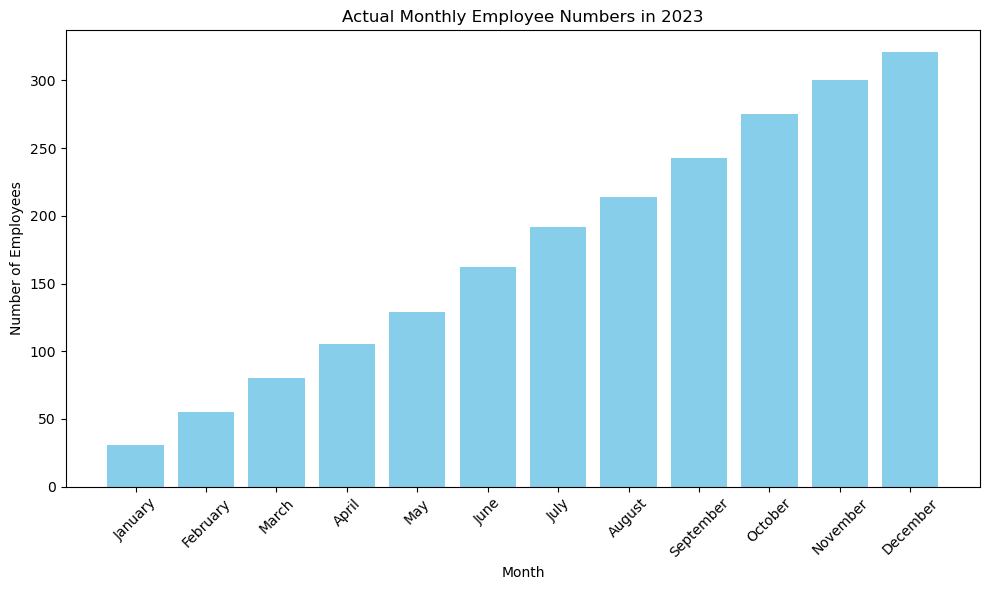

In [96]:
# Step 4: Plot the results on a bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, monthly_employee_counts, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Employees')
plt.title('Actual Monthly Employee Numbers in 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
# Calculons le taux de turnover
# Nous utilisons la formule : turnover = nombre de départ durant l'année / effectif moyen

def calculate_turnover(df):
    # Assuming the dataset is for a specific period, e.g., one year
    total_employees = len(df)
    effectif_moyen = mean_annual_employees
    total_departures = df['Date_de_départ'].notna().sum()
    turnover_rate = (total_departures / effectif_moyen) * 100
    return turnover_rate

turnover_rate = calculate_turnover(df)

turnover_rate

27.33744660654959

In [98]:
##########   1. Turnover Trends Over Time  ########## 

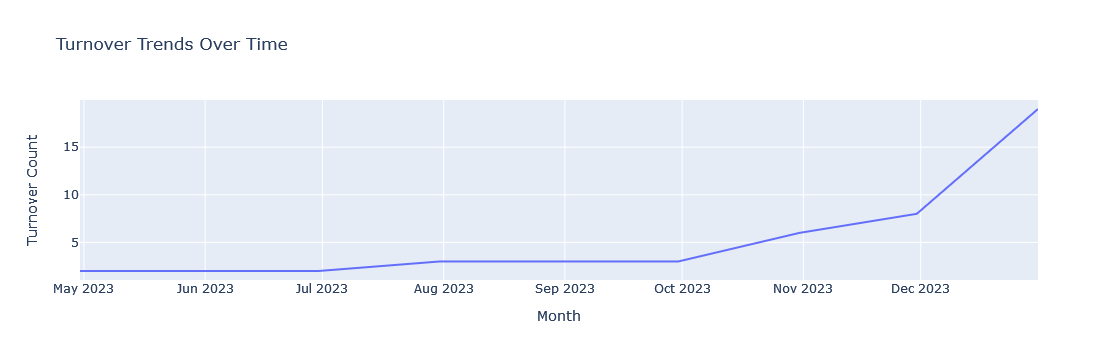

In [99]:

# Turnover Trends Over Time /gpt4-turbo
turnover_trends = df.set_index('Date_de_départ').resample('M').size()
fig_turnover_trends = px.line(x=turnover_trends.index, y=turnover_trends.values, labels={'x': 'Month', 'y': 'Turnover Count'}, title='Turnover Trends Over Time')
fig_turnover_trends.show()

In [100]:
##########   2. Analysis of Turnover Rates by Department   ##########

In [101]:

# Group data by department and calculate the number of departures and the average headcount for each department.

# Calculate the number of departures for each Service
departures_by_service = df.groupby('Service')['Date_de_départ'].count()

In [102]:
# Calculate the average headcount for each Service
# Assuming that the headcount is the number of unique Matricule per Service
average_headcount_by_service = df.groupby('Service')['Matricule'].nunique()

In [103]:
# Calculate the turnover rate for each Service
turnover_rate_by_service = (departures_by_service / average_headcount_by_service) * 100

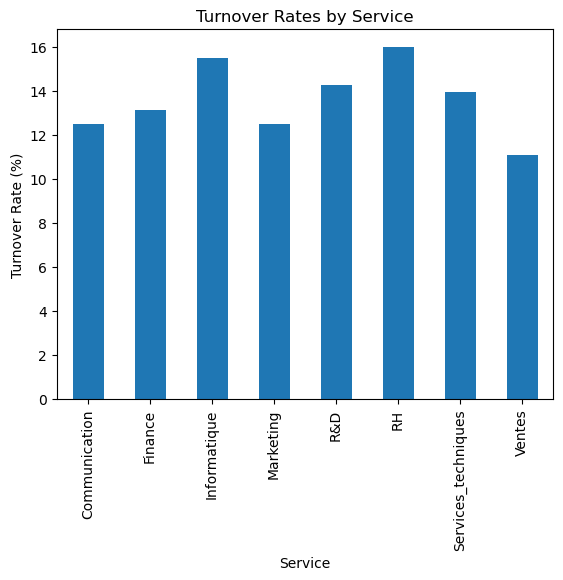

In [104]:
# Create a bar chart to display turnover rates by Service
turnover_rate_by_service.plot(kind='bar', title='Turnover Rates by Service')
plt.ylabel('Turnover Rate (%)')
plt.xlabel('Service')
plt.show()

In [105]:
##########   3. Impact of Tenure on Turnover   ##########

In [106]:


import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px

# Step 1: Load the data
df = pd.read_csv('turnover_data.csv', parse_dates=['Date_de_recrutement', 'Date_de_départ'], dayfirst=True)

# Step 2: Calculate the tenure for each employee
# We already have the function from your snippet, let's use it
def calculate_tenure(row):
    end_date = row['Date_de_départ'] if not pd.isnull(row['Date_de_départ']) else datetime(2023, 12, 31)
    return (end_date - row['Date_de_recrutement']).days

df['Tenure'] = df.apply(calculate_tenure, axis=1)

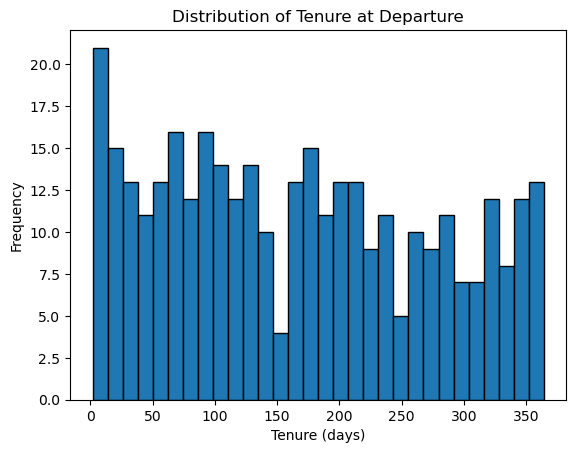

In [107]:
# Create a histogram using Matplotlib
plt.hist(df['Tenure'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Tenure at Departure')
plt.xlabel('Tenure (days)')
plt.ylabel('Frequency')
plt.show()

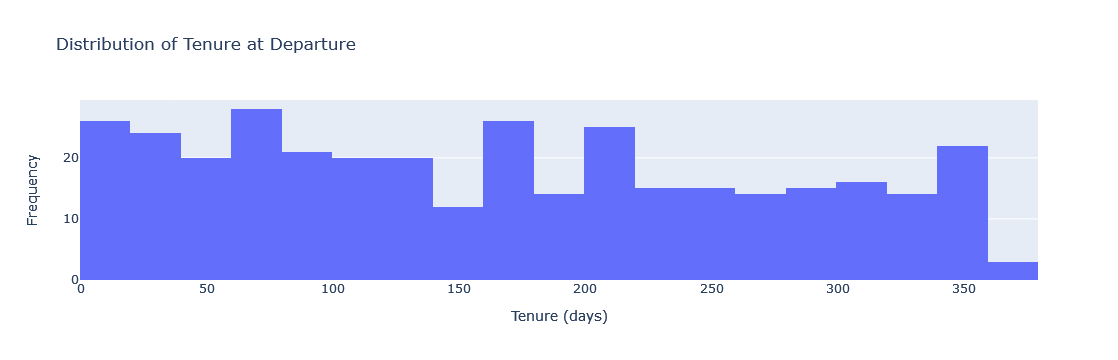

In [108]:
# Create a histogram using Plotly
fig = px.histogram(df, x="Tenure", nbins=30, title='Distribution of Tenure at Departure')
fig.update_xaxes(title_text='Tenure (days)')
fig.update_yaxes(title_text='Frequency')
fig.show()

In [109]:
# Define a function to calculate tenure (ancienneté) in months
def calculate_tenure(row):
    # If 'Date_de_départ' is not NaN, use it; otherwise, use the current date
    end_date = row['Date_de_départ'] if not pd.isnull(row['Date_de_départ']) else datetime(2023, 12, 31)
    # Calculate the tenure in months
    return ((end_date - row['Date_de_recrutement']).days) / 30.44

# Apply the function to each row
df['Tenure'] = df.apply(calculate_tenure, axis=1)

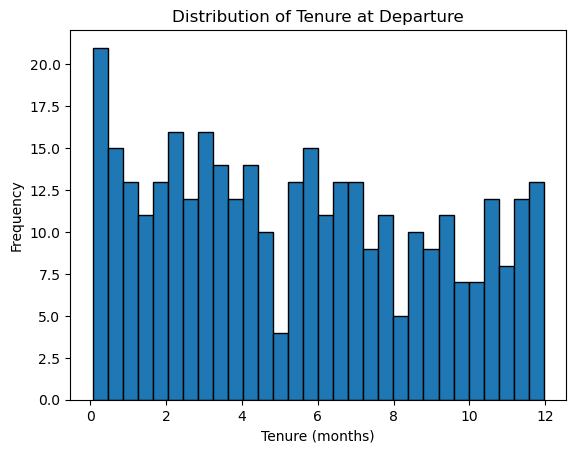

In [110]:
# Create a histogram using Matplotlib
plt.hist(df['Tenure'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Tenure at Departure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

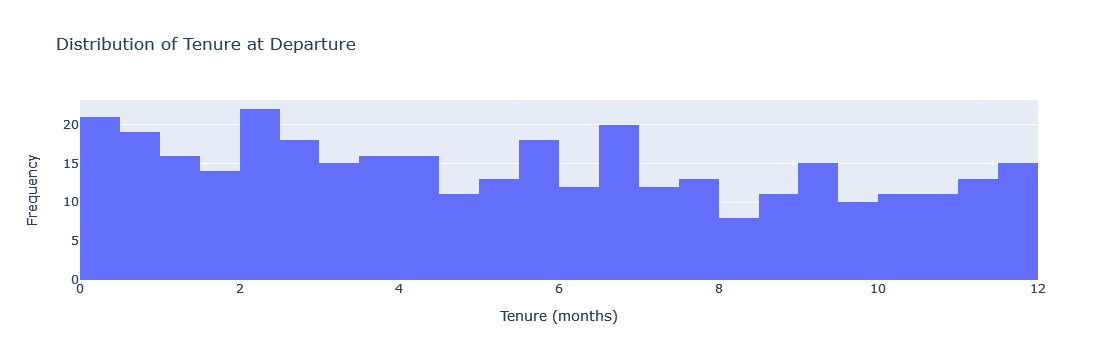

In [111]:
# Create a histogram using Plotly
fig = px.histogram(df, x="Tenure", nbins=30, title='Distribution of Tenure at Departure')
fig.update_xaxes(title_text='Tenure (months)')
fig.update_yaxes(title_text='Frequency')
fig.show()

In [112]:
from scipy.stats import ttest_ind

# Create a binary 'Turnover' column where 1 indicates the employee has left, and 0 indicates they have not
df['Turnover'] = df['Date_de_départ'].notnull().astype(int)


In [113]:

# Split the data into two groups: those who have left and those who have not
left_df = df[df['Turnover'] == 1]
stayed_df = df[df['Turnover'] == 0]


In [114]:
# This should work assuming that 'Tenure' is the column where we have stored the tenure of each employee in months (cf. last function). 

# Perform a t-test to see if there's a significant difference in tenure between the two groups
t_stat, p_value = ttest_ind(left_df['Tenure'], stayed_df['Tenure'], equal_var=False)


In [115]:
# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -7.221965295396098
p-value: 2.619354160537848e-10


In [116]:
# Interpret the p-value
alpha = 0.05  # Common threshold for significance
if p_value < alpha:
    print("There is a significant difference in tenure between employees who left and those who stayed.")
else:
    print("There is no significant difference in tenure between employees who left and those who stayed.")


There is a significant difference in tenure between employees who left and those who stayed.


In [117]:
##########   3. Impact of Tenure on Turnover / Bis   ########## 

In [118]:


import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px

# Step 1: Load the data
df = pd.read_csv('turnover_data.csv', parse_dates=['Date_de_recrutement', 'Date_de_départ'], dayfirst=True)

# Step 2: Calculate the tenure for each employee
# We already have the function from your snippet, let's use it
def calculate_tenure(row):
    end_date = row['Date_de_départ'] if not pd.isnull(row['Date_de_départ']) else datetime(2022, 12, 31)
    return (end_date - row['Date_de_recrutement']).days

df['Tenure'] = df.apply(calculate_tenure, axis=1)

In [119]:
# Calcul de l'effectif moyen annuel 
# Step 1: Create a function to calculate the number of employees present in each month
def calculate_monthly_employees(df, year=2023):
    monthly_counts = []
    for month in range(1, 13):
        # Define the start and end of the month
        start_date = pd.Timestamp(year=year, month=month, day=1)
        if month == 12:
            end_date = pd.Timestamp(year=year, month=month, day=31)
        else:
            end_date = pd.Timestamp(year=year, month=month+1, day=1) - pd.Timedelta(days=1)
        
        # Count employees who were recruited before the end of the month and either
        # left after the start of the month or have not left yet (NaN in 'Date_de_départ')
        count = df[(df['Date_de_recrutement'] <= end_date) &
                   ((df['Date_de_départ'].isna()) | (df['Date_de_départ'] >= start_date))].shape[0]
        monthly_counts.append(count)
    return monthly_counts

In [120]:
# Calculate the actual monthly employee numbers
monthly_employee_counts = calculate_monthly_employees(df)

In [121]:
# Step 2: Calculate the mean and median annual number of employees
mean_annual_employees = sum(monthly_employee_counts) / 12
median_annual_employees = pd.Series(monthly_employee_counts).median()

In [122]:
# Calculons le taux de turnover
# Nous utilisons la formule : turnover = nombre de départ durant l'année / effectif moyen

def calculate_turnover(df):
    # Assuming the dataset is for a specific period, e.g., one year
    total_employees = len(df)
    effectif_moyen = mean_annual_employees
    total_departures = df['Date_de_départ'].notna().sum()
    turnover_rate = (total_departures / effectif_moyen) * 100
    return turnover_rate

turnover_rate = calculate_turnover(df)

In [123]:
# Define a function to calculate tenure (ancienneté) in months
def calculate_tenure(row):
    # If 'Date_de_départ' is not NaN, use it; otherwise, use the current date
    end_date = row['Date_de_départ'] if not pd.isnull(row['Date_de_départ']) else datetime(2023, 12, 31)
    # Calculate the tenure in months
    return ((end_date - row['Date_de_recrutement']).days) / 30.44

# Apply the function to each row
df['Tenure'] = df.apply(calculate_tenure, axis=1)


In [124]:
# We can test the relationship between Turnover and Tenure using statistical methods. 
# One common method is to use a Chi-Square test for independence if both Turnover and Tenure are categorical variables. 
# However, in our case, Tenure is a continuous variable. So, a better approach might be to use a point-biserial correlation coefficient, 
# which measures the relationship between a binary variable (Turnover) and a continuous variable (Tenure).



# First, we need to create a binary variable for Turnover, where 1 indicates that the employee has left the company 
# and 0 indicates that the employee is still with the company.

df['Turnover'] = df['Date_de_départ'].notna().astype(int)

In [125]:
# Then, you can calculate the point-biserial correlation coefficient:

from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(df['Turnover'], df['Tenure'])


# The correlation value will tell you the strength and direction of the relationship between Turnover and Tenure. 
# A positive correlation indicates that employees with longer tenure are more likely to leave the company, 
# while a negative correlation indicates the opposite.

# The p_value will tell you whether the correlation is statistically significant. 
# If p_value is less than 0.05, you can reject the null hypothesis that there is no relationship between Turnover and Tenure, 
# and conclude that the correlation is statistically significant.

# Please note that correlation does not imply causation. Even if there is a significant correlation between Turnover and Tenure, 
# it does not necessarily mean that longer tenure causes higher turnover. There may be other factors at play.

In [126]:
# Display the result
print(correlation, p_value)

-0.2897653052491571 3.3803259966536586e-08


In [127]:
# Interpret the p-value
alpha = 0.05  # Common threshold for significance
if p_value < alpha:
    print("We can reject the null hypothesis that there is no relationship between Turnover and Tenure, and conclude that the correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

We can reject the null hypothesis that there is no relationship between Turnover and Tenure, and conclude that the correlation is statistically significant.


In [128]:
##########   4. Gender-Based Turnover Analysis    ########## (gpt4-turbo)

In [129]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Step 1: Load the data
df = pd.read_csv('turnover_data.csv', parse_dates=['Date_de_recrutement', 'Date_de_départ'], dayfirst=True)

In [130]:
# Step 2: Preprocess the data
# Ensure that 'Genre' is a categorical variable
df['Genre'] = df['Genre'].astype('category')

print(df['Genre'])

0      Femme
1      Femme
2      Homme
3      Femme
4      Homme
       ...  
345    Homme
346    Homme
347    Femme
348    Femme
349    Homme
Name: Genre, Length: 350, dtype: category
Categories (2, object): ['Femme', 'Homme']


In [131]:
# Step 3: Group data by gender and calculate the number of departures for each gender
departures_by_gender = df.groupby('Genre')['Date_de_départ'].count()

print(departures_by_gender)

Genre
Femme    25
Homme    23
Name: Date_de_départ, dtype: int64


C:\Users\Chris MUBA\AppData\Local\Temp\ipykernel_6380\550453441.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [132]:
# Step 4: Calculate the turnover rate for each gender
# Count the total number of employees by gender
total_employees_by_gender = df['Genre'].value_counts()

print(total_employees_by_gender)

Genre
Homme    199
Femme    151
Name: count, dtype: int64


In [133]:
# Calculate turnover rate
turnover_rate_by_gender = (departures_by_gender / total_employees_by_gender)*100

print(turnover_rate_by_gender)

Genre
Femme    16.556291
Homme    11.557789
dtype: float64


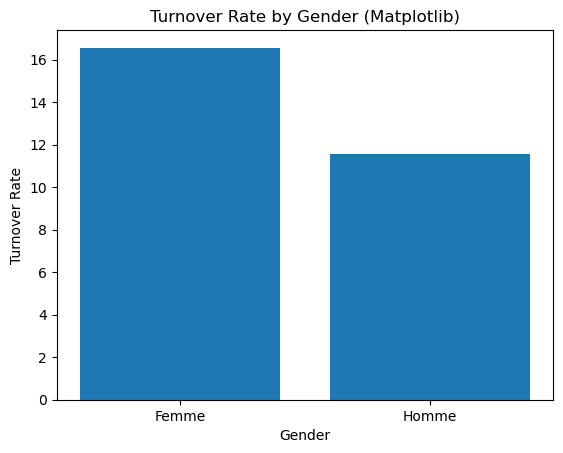

In [134]:
# Step 5: Create bar charts to compare turnover rates between genders
# Using Matplotlib
plt.bar(turnover_rate_by_gender.index, turnover_rate_by_gender.values)
plt.title('Turnover Rate by Gender (Matplotlib)')
plt.xlabel('Gender')
plt.ylabel('Turnover Rate')
plt.show()

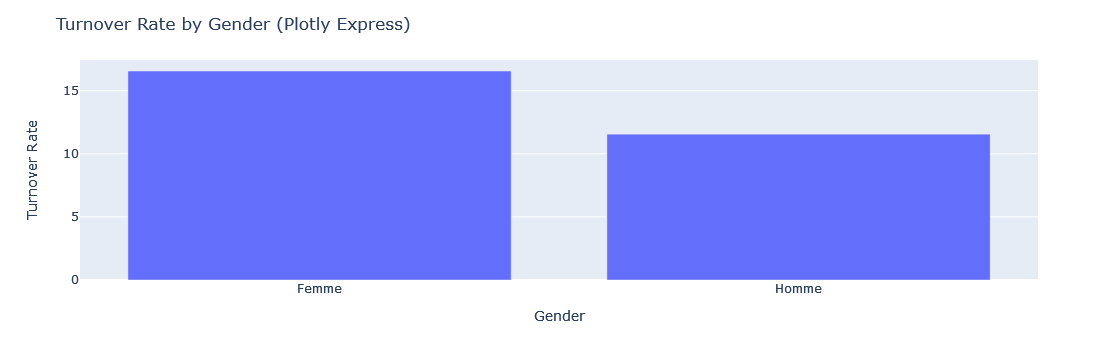

In [135]:
# Using Plotly Express
fig = px.bar(x=turnover_rate_by_gender.index, y=turnover_rate_by_gender.values, labels={'x': 'Gender', 'y': 'Turnover Rate'})
fig.update_layout(title='Turnover Rate by Gender (Plotly Express)')
fig.show()

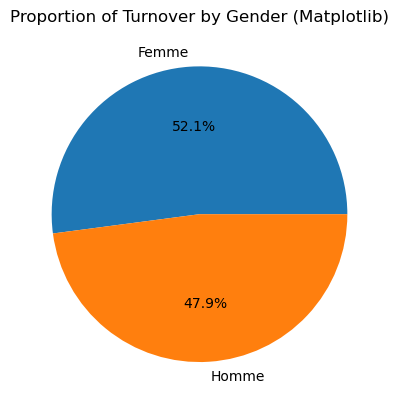

In [136]:
# Step 6: Use pie charts to show the proportion of turnover by gender
# Using Matplotlib
plt.pie(departures_by_gender, labels=departures_by_gender.index, autopct='%1.1f%%')
plt.title('Proportion of Turnover by Gender (Matplotlib)')
plt.show()

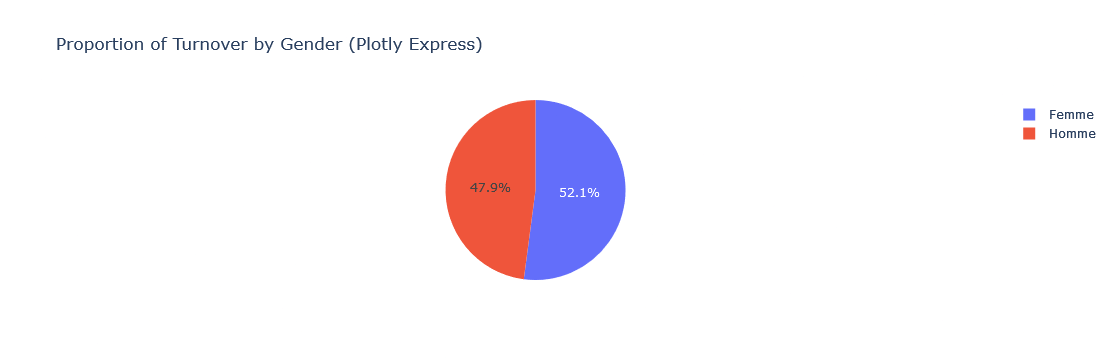

In [137]:
# Using Plotly Express
fig = px.pie(values=departures_by_gender, names=departures_by_gender.index, title='Proportion of Turnover by Gender (Plotly Express)')
fig.show()

In [138]:
##########   4. Gender-Based Turnover Analysis    ########## gpt4

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Step 1: Load the data
df = pd.read_csv('turnover_data.csv', parse_dates=['Date_de_recrutement', 'Date_de_départ'], dayfirst=True)

In [140]:
# Group by gender and count departures
departures_by_gender = df[df['Date_de_départ'].notna()].groupby('Genre')['Matricule'].count()
print(departures_by_gender)

Genre
Femme    25
Homme    23
Name: Matricule, dtype: int64


In [141]:
# Calculate turnover rate
total_by_gender = df.groupby('Genre')['Matricule'].count()
turnover_rate = (departures_by_gender / total_by_gender)*100
print(turnover_rate)

Genre
Femme    16.556291
Homme    11.557789
Name: Matricule, dtype: float64


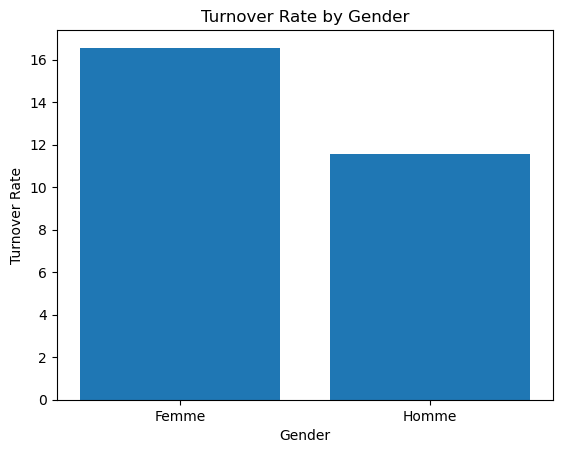

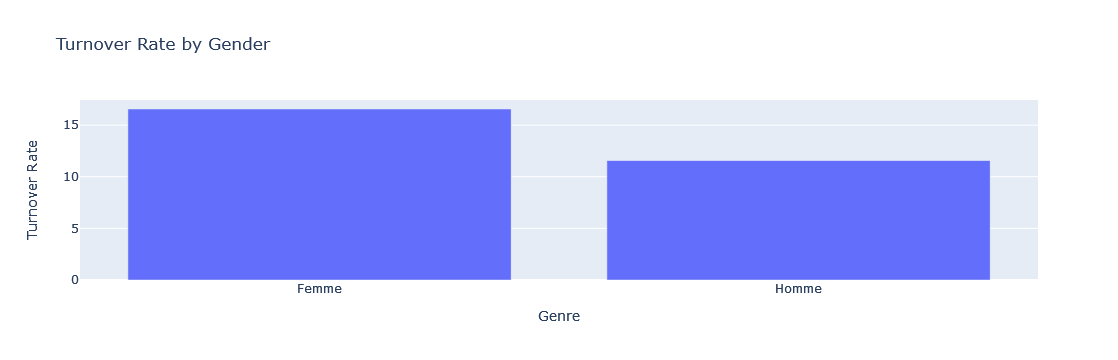

In [142]:
# Bar chart with matplotlib
plt.bar(turnover_rate.index, turnover_rate)
plt.title('Turnover Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Turnover Rate')
plt.show()

# Bar chart with plotly
fig = px.bar(turnover_rate, x=turnover_rate.index, y=turnover_rate, labels={'y':'Turnover Rate', 'x':'Gender'}, title='Turnover Rate by Gender')
fig.show()

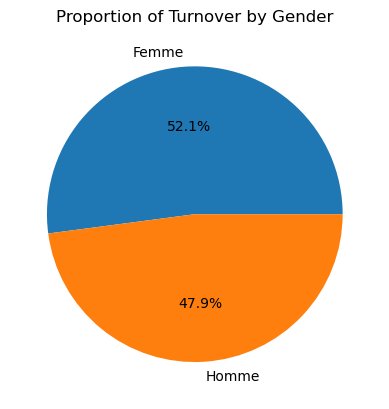

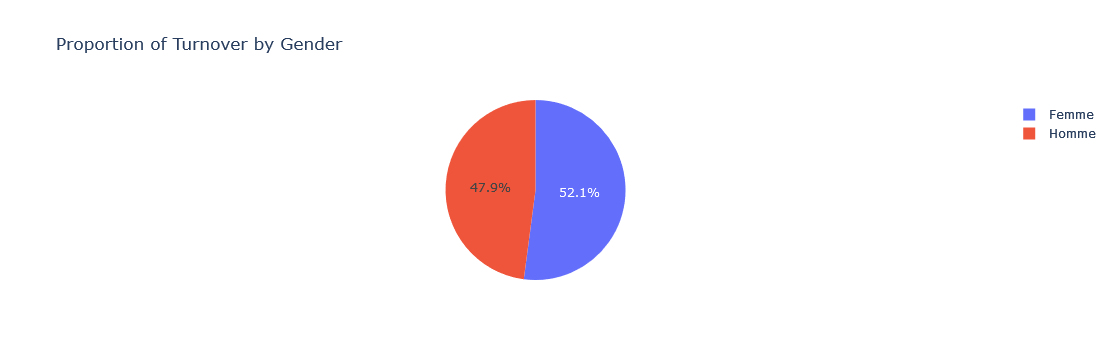

In [143]:
# Pie chart with matplotlib
plt.pie(departures_by_gender, labels=departures_by_gender.index, autopct='%1.1f%%')
plt.title('Proportion of Turnover by Gender')
plt.show()

# Pie chart with plotly
fig = px.pie(departures_by_gender, values=departures_by_gender, names=departures_by_gender.index, title='Proportion of Turnover by Gender')
fig.show()

In [144]:
##########   5. Gender-Based Turnover Analysis    ########## gpt4-turbo

In [145]:
# First, let's import the necessary libraries and read the data from the CSV file:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv('turnover_data.csv', parse_dates=['Date_de_recrutement', 'Date_de_départ'], dayfirst=True)

In [146]:
# We'll group the data by the 'Poste_occupé' column and calculate the number of departures for each position:
# Create a new column to indicate whether an employee has left
df['Departed'] = df['Date_de_départ'].notnull()

# Group by 'Poste_occupé' and count the number of departures
departures_by_position = df.groupby('Poste_occupé')['Departed'].sum().reset_index()

print(departures_by_position)

                        Poste_occupé  Departed
0                           Acheteur         0
1    Administrateur Bases de données         1
2             Administrateur réseaux         3
3             Administrateur système         2
4                 Analyste financier         1
5                      Animateur SAV         2
6               Animateur des ventes         1
7                       Assistant RH         1
8               Assistant commercial         0
9               Assistant de gestion         2
10               Assistant marketing         0
11                Business developer         0
12                  Category manager         1
13    Chargé Affaires Réglementaires         2
14  Chargé d'intelligence économique         1
15           Chargé de communication         0
16              Chargé de la qualité         4
17                 Chargé d’affaires         0
18                Chef de projet R&D         1
19          Chef de projet marketing         2
20           

In [147]:
# let's calculate the turnover rate for each position. 
# The turnover rate is the number of departures divided by the total number of employees who have held that position

# Count the total number of employees for each position
total_by_position = df['Poste_occupé'].value_counts().reset_index()
total_by_position.columns = ['Poste_occupé', 'Total']

print(total_by_position)


                        Poste_occupé  Total
0          Responsable cybersécurité     14
1               Assistant de gestion     13
2                           Acheteur     13
3     Chargé Affaires Réglementaires     13
4                  Chargé d’affaires     12
5                      Animateur SAV     12
6                          Comptable     12
7                Assistant marketing     11
8               Contrôleur des coûts     11
9               Chargé de la qualité     11
10   Administrateur Bases de données     11
11           Ingénieur planification     11
12                      Assistant RH     10
13            Administrateur système     10
14             Ingénieur généraliste     10
15         Gestionnaire Supply Chain      9
16             Ingénieur avant-vente      9
17                Chef de projet R&D      9
18            Administrateur réseaux      9
19     Contrôleur de gestion sociale      9
20              Responsable matériel      8
21               Ingénieur packa

In [148]:
# Merge the departures and totals dataframes
turnover_by_position = pd.merge(departures_by_position, total_by_position, on='Poste_occupé')

print(turnover_by_position)

                        Poste_occupé  Departed  Total
0                           Acheteur         0     13
1    Administrateur Bases de données         1     11
2             Administrateur réseaux         3      9
3             Administrateur système         2     10
4                 Analyste financier         1      6
5                      Animateur SAV         2     12
6               Animateur des ventes         1      5
7                       Assistant RH         1     10
8               Assistant commercial         0      5
9               Assistant de gestion         2     13
10               Assistant marketing         0     11
11                Business developer         0      3
12                  Category manager         1      6
13    Chargé Affaires Réglementaires         2     13
14  Chargé d'intelligence économique         1      7
15           Chargé de communication         0      4
16              Chargé de la qualité         4     11
17                 Chargé d’

In [149]:
# Calculate the turnover rate
turnover_by_position['Turnover_Rate'] = (turnover_by_position['Departed'] / turnover_by_position['Total'])*100

print(turnover_by_position['Turnover_Rate'])

0      0.000000
1      9.090909
2     33.333333
3     20.000000
4     16.666667
5     16.666667
6     20.000000
7     10.000000
8      0.000000
9     15.384615
10     0.000000
11     0.000000
12    16.666667
13    15.384615
14    14.285714
15     0.000000
16    36.363636
17     0.000000
18    11.111111
19    28.571429
20    25.000000
21     0.000000
22    28.571429
23    22.222222
24     9.090909
25    28.571429
26    25.000000
27    40.000000
28     0.000000
29    16.666667
30     0.000000
31    11.111111
32     0.000000
33    20.000000
34    12.500000
35    27.272727
36     0.000000
37    16.666667
38    25.000000
39     7.142857
40     0.000000
41    28.571429
42     0.000000
Name: Turnover_Rate, dtype: float64


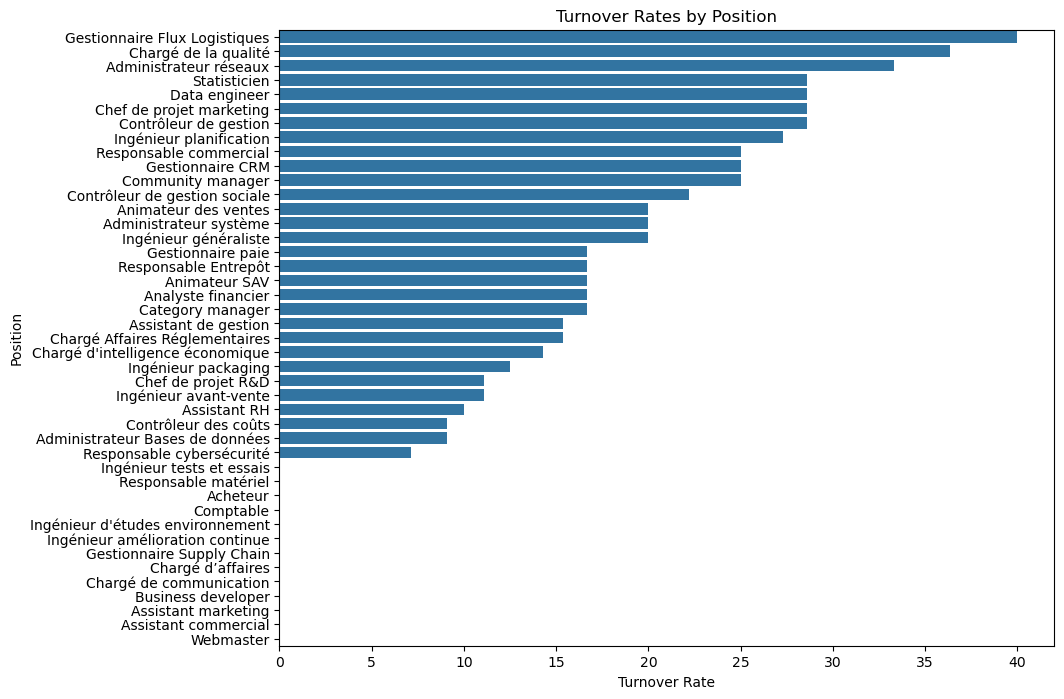

In [150]:
# we'll create bar charts to compare turnover rates by position:

# Sort the positions by turnover rate
turnover_by_position_sorted = turnover_by_position.sort_values(by='Turnover_Rate', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Turnover_Rate', y='Poste_occupé', data=turnover_by_position_sorted)
plt.xlabel('Turnover Rate')
plt.ylabel('Position')
plt.title('Turnover Rates by Position')
plt.show()

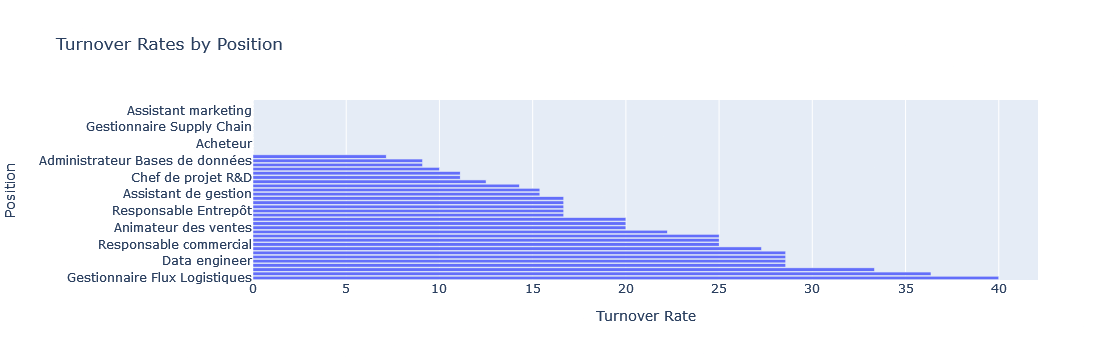

In [151]:
# let's create the bar chart to compare turnover rates by position using Plotly Express:
import plotly.express as px

# Sort the positions by turnover rate for better visualization
turnover_by_position_sorted = turnover_by_position.sort_values(by='Turnover_Rate', ascending=False)

# Create the bar chart using Plotly Express
fig_bar = px.bar(turnover_by_position_sorted, x='Turnover_Rate', y='Poste_occupé', orientation='h',
                 labels={'Turnover_Rate': 'Turnover Rate', 'Poste_occupé': 'Position'},
                 title='Turnover Rates by Position')
fig_bar.show()

In [152]:
##########   6. Reasons for Departure and Their Trends    ########## gpt4-turbo

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load the data
df = pd.read_csv('turnover_data.csv', parse_dates=['Date_de_recrutement', 'Date_de_départ'], dayfirst=True)


In [154]:

# Preprocess the data
# Convert 'Date_de_départ' to datetime and fill NaT for missing values
df['Date_de_départ'] = pd.to_datetime(df['Date_de_départ'], errors='coerce')


In [155]:
# Group data by reason for departure and by time frame
# We'll create a new column for the month of departure
df['Month_of_departure'] = df['Date_de_départ'].dt.to_period('M')



In [156]:
# Calculate the number of departures for each reason over time
departures_by_reason = df.groupby(['Month_of_departure', 'Raison_du_départ']).size().unstack(fill_value=0)



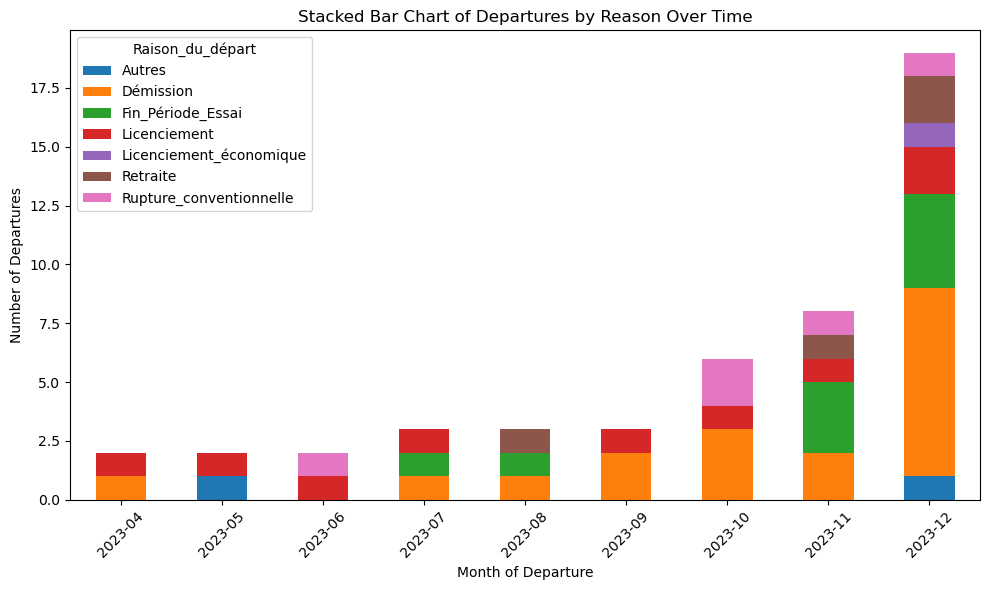

In [157]:

# Create a stacked bar chart with Matplotlib
plt.figure(figsize=(10, 6))
departures_by_reason.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Stacked Bar Chart of Departures by Reason Over Time')
plt.xlabel('Month of Departure')
plt.ylabel('Number of Departures')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



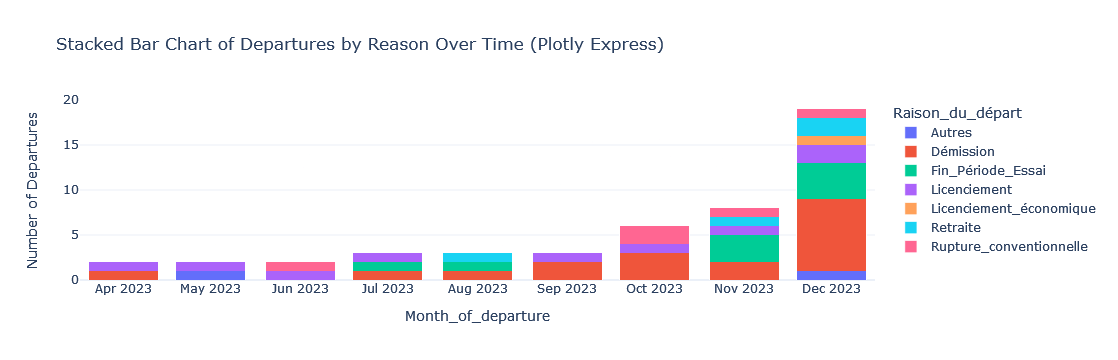

In [158]:


import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv('turnover_data.csv', parse_dates=['Date_de_recrutement', 'Date_de_départ'], dayfirst=True)

# Convert 'Date_de_départ' to datetime and fill NaT for missing values
df['Date_de_départ'] = pd.to_datetime(df['Date_de_départ'], errors='coerce')

# Group data by reason for departure and by time frame
# We'll create a new column for the month of departure
df['Month_of_departure'] = df['Date_de_départ'].dt.to_period('M')

# Convert 'Month_of_departure' from Period to string for JSON serialization
df['Month_of_departure'] = df['Month_of_departure'].astype(str)

# Calculate the number of departures for each reason over time
departures_by_reason = df.groupby(['Month_of_departure', 'Raison_du_départ']).size().unstack(fill_value=0)

# Create a stacked bar chart with Plotly Express
fig = px.bar(departures_by_reason, x=departures_by_reason.index, y=departures_by_reason.columns,
             title="Stacked Bar Chart of Departures by Reason Over Time (Plotly Express)",
             labels={'value':'Number of Departures', 'variable':'Reason for Departure'},
             template='plotly_white')

fig.update_layout(barmode='stack')
fig.show()
